# 0. Set Up

In [1]:
# Librerias
!git clone https://github.com/domingomery/balu3
!pip install ./balu3

Cloning into 'balu3'...
remote: Enumerating objects: 270, done.
remote: Counting objects: 100% (270/270), done.
remote: Compressing objects: 100% (191/191), done.
remote: Total 270 (delta 157), reused 180 (delta 75), pack-reused 0
Receiving objects: 100% (270/270), 71.11 KiB | 1.42 MiB/s, done.
Resolving deltas: 100% (157/157), done.
Processing ./balu3
  Preparing metadata (setup.py) ... done
  Created wheel for balu3: filename=balu3-1.0-py3-none-any.whl size=43701 sha256=e067925246471b7e730dceaf5a7670d634810a243e626888b41b7654e20d3a85
  Stored in directory: /tmp/pip-ephem-wheel-cache-vae72clj/wheels/9e/f6/a9/3d39da83a3504331129d706f5b04ceb3dbf0ec0f313cdb8fcf
Successfully built balu3


In [ ]:
# Numpy & Maplotlib
import numpy             as np
import matplotlib.pyplot as plt
import cv2


# Balu
from   balu3.ft.norm     import minmax
from   balu3.fx.chr      import lbp, haralick, gabor, hog, basicint, contrast, clp
from   balu3.fs.sel      import jfisher
from   balu3.fs.sel      import sfs, exsearch, clean
from   balu3.fx.geo      import basicgeo,fitellipse,hugeo,flusser,gupta
from   tqdm.auto         import tqdm
from   balu3.im.proc import im_grad,fspecial,gradlog
from   balu3.ft.trans  import pca

# Sklearn
from sklearn.metrics   import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier, NearestCentroid # KNN y DMin
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis # LDA

from sklearn.naive_bayes import GaussianNB  # Naive Bayer
from sklearn.base import BaseEstimator, ClassifierMixin # Bayes KDE
from sklearn.neighbors import KernelDensity

from sklearn.tree import DecisionTreeClassifier # Decision Tree
from sklearn.ensemble import RandomForestClassifier # Random Forest
from sklearn.linear_model import LogisticRegression # Regresion logistica
from sklearn.neural_network import MLPClassifier # NN
from sklearn.svm import SVC # SVM

from sklearn.feature_selection import SelectKBest, chi2
from sklearn.feature_selection import SelectFromModel


from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import RFE

from   sklearn.model_selection import train_test_split


# 1. Image Loading

In [2]:
!wget https://www.dropbox.com/scl/fi/1egkpx414yen4affvczw9/jaffec.zip?rlkey=txhzx69hg0wh2xklmg3oc1u6t
!mv jaffec.zip?rlkey=txhzx69hg0wh2xklmg3oc1u6t jaffec.zip
!unzip -qq jaffec.zip

--2024-06-13 00:42:38--  https://www.dropbox.com/scl/fi/1egkpx414yen4affvczw9/jaffec.zip?rlkey=txhzx69hg0wh2xklmg3oc1u6t
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:6018:18::a27d:312
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://ucf5d630434af43f67db3431787b.dl.dropboxusercontent.com/cd/0/inline/CUtrx6jQin-UB8SyaMvKYfs2DTc-oK6jAsQZtI6AUBSXdzykTspA-ELDuroU3ml-BUo7rH4R9t18PpF3anF0NV64iCklsH7WCod6v7eqHwCnO0K-lDZCGIzjED1-q3LhUF0/file# [following]
--2024-06-13 00:42:38--  https://ucf5d630434af43f67db3431787b.dl.dropboxusercontent.com/cd/0/inline/CUtrx6jQin-UB8SyaMvKYfs2DTc-oK6jAsQZtI6AUBSXdzykTspA-ELDuroU3ml-BUo7rH4R9t18PpF3anF0NV64iCklsH7WCod6v7eqHwCnO0K-lDZCGIzjED1-q3LhUF0/file
Resolving ucf5d630434af43f67db3431787b.dl.dropboxusercontent.com (ucf5d630434af43f67db3431787b.dl.dropboxusercontent.com)... 162.125.3.15, 2620:100:6018:15::a27d:30f
Connecting to ucf5d6304

In [15]:
def num2fixstr(x: int, d: int) -> str:
    """
    Transforma en un string un numero x en una cantidad de x digitos
    """
    string = '%0*d' % (d, x)
    return string

def get_image_path(num_class: int, num_img: int, sep='_') -> str:
    """
    Retorna la ruta de la imagen a cargar dada una clase num_class y un
    identificador de imagen num_img
    """

    FPATH = 'jaffec'
    PREFIX = 'face'
    img_class = num2fixstr(num_class, 3)
    img_num = num2fixstr(num_img, 5)
    img_path = f'{FPATH}/{PREFIX}_{img_class}_{img_num}.png'

    return img_path

def imageload(num_class: int, num_img: int, echo='off') -> str:
    """
    Carga la imagen
    """
    path = get_image_path(num_class, num_img)
    if echo == 'on':
        print(f'loading image {path} ...')
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)

    return img

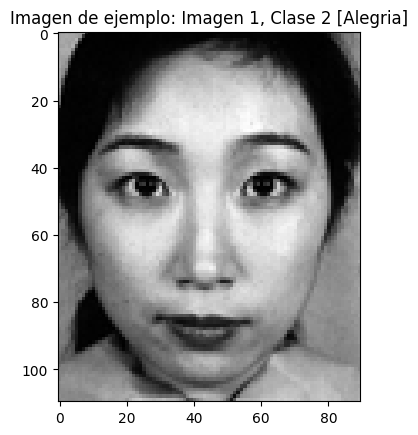

In [69]:
test_img = imageload(1,1)
plt.title('Imagen de ejemplo: Imagen 1, Clase 2 [Alegria]')
plt.imshow(test_img, cmap='gray')
plt.show()

# 2. Image Preprocessing [TODO]

# 3. Feature Extraction


In [167]:
K = 7 # Cantidad de clases del dataset
N = 30 # Cantidad de imagenes por clase
y = np.zeros((K * N), 'int') # Vector de clasificacion


# ------------------------------- LBP ------------------------------------------
hdiv_0 = 1 # LBP con 8x8 particiones
vdiv_0 = 1
Mlbp = 10 * hdiv_0 * vdiv_0 # Numero de elementos vector LBP
Xlbp = np.zeros((K * N, Mlbp)) # Matriz de caracteristicas para descriptor LBP


# ----------------------------- HARALICK ---------------------------------------
Mhar = 24 # Numero de elmeentos vector Haralick para distancia = 1
Xhar = np.zeros((K * N, Mhar)) # Matriz de caracteristicas de Haralick
d_0 = 1 # Parametro de distancia

# ------------------------------- Hog ------------------------------------------
hog_orientations = 9
px_0 = 64 # Parametro pixeles por bloque: 64 pixeles por bloque
cl_0 = 1 # Parametro celdas por bloque: 2 celdas por bloque
bn = 9 # Numero de bins del descriptor Hog.
Mhog = 9 # Numero de elementos en total del vector descriptor
Xhog = np.zeros((K * N, Mhog)) # Matriz  de caracteristicas para descriptor Hog


# ------------------------------- Gabor ----------------------------------------
rotations_0 = 8 # 8 rotaciones
dilations_0 = 8 # 8 escalas
Mgab = rotations_0 * dilations_0 + 3 # Numero de elementos vector de Gabor para 8 rotaciones y escalas
Xgab = np.zeros((K * N, Mgab))


In [168]:

t = 0
# sc: Selected Channel (SC)
# Inicializamos una matriz de caracteristicas para cada canal.
Xlbp = np.zeros((K * N, Mlbp))
Xhar = np.zeros((K * N, Mhar))
Xhog = np.zeros((K * N, Mhog))
Xgab = np.zeros((K * N, Mgab))

print(f' Extracting features ... '.center(100, '*'))

for k in range(K): # Por cada clase ...
    print(f'Extracting features: batch {k + 1}/7')

    for i in tqdm(range(N)): # Por cada imagen ...
        num_class = k + 1
        num_img = i + 1
        # Cargamos la i-esima imagen de la k-esima clase
        img = 255*imageload(num_class, num_img)
        # Preprocesamos la imagen para eliminar ruido y resaltar el lunar

        # LBP con 1x1 particiones
        Xlbp[t,:] = lbp(img, hdiv=hdiv_0, vdiv=vdiv_0,
                            mapping='uniform', norm=True)

        # Haralick con d=1 pixeles
        Xhar[t,:] = haralick(img, distance=d_0)

        # Hog con 9 orientaciones
        Xhog[t,:] = hog(img, orientations=hog_orientations,
                            cells_per_block=(cl_0, cl_0),
                            pixels_per_cell=(px_0, px_0),
                            norm=False)
        # Gabor
        Xgab[t,:] = gabor(img,
                              dilations=dilations_0,
                              rotations=rotations_0)

        # Vector de clasificacion
        y[t] = k + 1 # Deberia ser el mismo para los 3 canales.
        t = t + 1

************************************* Extracting features ... **************************************
Extracting features: batch 1/7


  0%|          | 0/30 [00:00<?, ?it/s]

Extracting features: batch 2/7


  0%|          | 0/30 [00:00<?, ?it/s]

Extracting features: batch 3/7


  0%|          | 0/30 [00:00<?, ?it/s]

Extracting features: batch 4/7


  0%|          | 0/30 [00:00<?, ?it/s]

Extracting features: batch 5/7


  0%|          | 0/30 [00:00<?, ?it/s]

Extracting features: batch 6/7


  0%|          | 0/30 [00:00<?, ?it/s]

Extracting features: batch 7/7


  0%|          | 0/30 [00:00<?, ?it/s]

In [169]:
X = np.concatenate((Xlbp, Xhar, Xhog, Xgab), axis=1)

# 4. Leave One Person Out

In [172]:
X.shape

(210, 110)

In [199]:
def split_train_test_val(X, y, i):
  """
  Input: Matriz de caracteristicas X y vector de clases y
  Output: Conjuntos training, testing y validation.
  """
  # i: i-esima mujer
  W = 10 # 10 mujeres en total
  K = np.max(y) # Cantidad de clases = 7
  N = X.shape[0] // K # Numero de muestras por clase = 30
  N_test = (N // W) * K # numero de muestras de testing = 21
  N_val = (N // W) * K # numero de muestras de validation
  N_train = (N * K) - (N_test + N_val) # numero de muestras de training

  M = X.shape[1]  # Cantidad de caracteristicas

  # Matrices de caracteristicas para Training, testing y Validation.
  Xtrain = np.zeros((N_train, M))
  ytrain = np.zeros((N_train), 'int')

  Xtest = np.zeros((N_test, M))
  ytest = np.zeros((N_test), 'int')

  Xval = np.zeros((N_val, M))


  t = 0
  itrain = 0
  itest = 0
  ival = 0

  for k in range(0, K): # Por cada clase
    for n in range(0, N): # Por cada muestra
      # Testing -> Mujer i
      # Ejemplo: MujerTest = 0, entonces son las imagenes 0 hasta 2
      if i * 3 <= n <= (i * 3) + 2:
        Xtest[itest,:] = X[t,:]
        ytest[itest] = y[t]
        itest += 1
      # Validation -> Mujer i+1 % 10
      # Ejemplo: MujerVal = 1, entonces son las imagenes 3 hasta 5
      if ((i + 1) % 10) * 3 <= n <= ((i + 1) % 10) * 3 + 2:
        Xval[ival,:] = X[t,:]
        ival +=1
      # Training -> Mujeres que no sean ni Mujer test o Mujer validation
      # Ejemplo: MujeresTrain = 2..9, entonces son las imagenes 6 hasta la 29
      itrain_idxs = [j * 3 for j in range(10) if j != i and j != ((i + 1) % 10)]
      if n in itrain_idxs:
        Xtrain[itrain,:] = X[t,:]
        ytrain[itrain] = y[t]
        itrain += 1

      t += 1

  return Xtrain, ytrain, Xtest, ytest, Xval


In [209]:
def clean_subsets(Xtrain, Xtest, Xval):
  sclean = clean(Xtrain) # Obtenemos las columnas sin correlaciones negativas y nulos
  Xtrain_clean = Xtrain[:, sclean] # Filtramos en base a las columnas determinadas por training
  Xtest_clean = Xtest[:, sclean]
  Xval_clean = Xval[:, sclean]
  return Xtrain_clean, Xtest_clean, Xval_clean

def normalize_subsets(Xtrain, Xtest, Xval):
  Xtrain_norm, a, b = minmax(Xtrain)
  Xtest_norm = Xtest * a + b
  Xval_norm = Xval * a + b
  return Xtrain_norm, Xtest_norm, Xval_norm

In [218]:
for i in range(0, 10):
  Xtrain, ytrain, Xtest, ytest, Xval = split_train_test_val(X, y, i)
  # 1. Clean
  Xtrain_clean, Xtest_clean, Xval_clean = clean_subsets(Xtrain, Xtest, Xval)
  # 2. Normalization
  Xtrain_norm, Xtest_norm, Xval_norm = normalize_subsets(Xtrain_clean, Xtest_clean, Xval_clean)
  # 3. Feature Selection [TODO]
  # 4. Feature Transformation [TODO]
  # 5. Classification [TODO]
